In this tutorial, we learn how to obtain backbone orientations and translations from protein structures using `protstruc`. For each residue, a 3x3 backbone orientation matrix is defined by a Gram-Schmidt orthonormalized basis of two vectors: N-Ca and C-Ca vectors. Meanwhile, a three-element translation vector is simply defined as a coordinate of the Ca atom.

In [1]:
import protstruc as ps
import matplotlib.pyplot as plt
import numpy as np

/data/project/dohoon/miniconda3/envs/torch12/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pdb_ids = ['1REX', '4EOT']
sb = ps.StructureBatch.from_pdb_id(pdb_ids)

## Extracting backbone orientations and translations from `StructureBatch` object

In [3]:
orientations = sb.backbone_orientations(a1='N', a2='CA', a3='C').numpy()
translations = sb.backbone_translations(atom='CA').numpy()

orientations.shape, translations.shape

((2, 184, 3, 3), (2, 184, 3))

## Orthogonality of residue frames (orientations)

Let's check whether vectors forming residue frames (which represent the orientation of residues) are orthogonal for each others.

In [4]:
from itertools import combinations
for i, j in combinations([0, 1, 2], 2):
    inner_products = (orientations[:, :, :, i] * orientations[:, :, :, j]).sum(axis=2)

    assert np.allclose(inner_products[~np.isnan(inner_products)], 0.0, atol=1e-6)

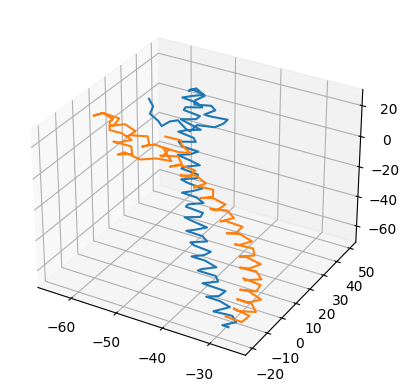

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

prt_idx = 1
chain_idx = sb.get_chain_idx()

for idx in [0, 1]:
    chain_mask = chain_idx[prt_idx] == idx
    # plot backbone CA atoms 
    ax.plot(
        translations[prt_idx, chain_mask, 0],
        translations[prt_idx, chain_mask, 1],
        translations[prt_idx, chain_mask, 2],
    )

## Visualizing both the orientations and translations of residues

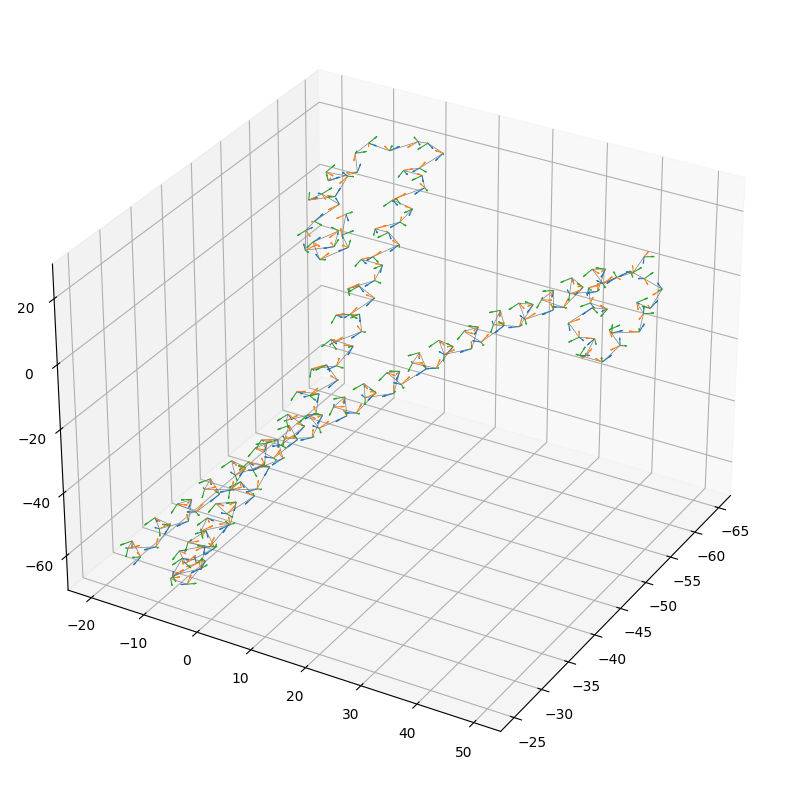

In [16]:
sb = ps.StructureBatch.from_pdb('4EOT.pdb')
t = sb.backbone_translations()[0].numpy()
o = sb.backbone_orientations()[0].numpy()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

prt_idx = 0
chain_idx = sb.get_chain_idx()

for idx in [0, 1]:
    chain_mask = chain_idx[prt_idx] == idx
        
    x, y, z = t[chain_mask, 0], t[chain_mask, 1], t[chain_mask, 2]
    o_x, o_y, o_z = o[chain_mask, :, 0], o[chain_mask, :, 1], o[chain_mask, :, 2]

    lw, length = 0.75, 1.5
    ax.quiver(x, y, z, o_x[:, 0], o_x[:, 1], o_x[:, 2], color='C0', linewidth=lw, length=length)
    ax.quiver(x, y, z, o_y[:, 0], o_y[:, 1], o_y[:, 2], color='C1', linewidth=lw, length=length)
    ax.quiver(x, y, z, o_z[:, 0], o_z[:, 1], o_z[:, 2], color='C2', linewidth=lw, length=length)

    ax.plot(x, y, z, c='C7', linewidth=0.5)
    ax.view_init(30, 30)